# Challenge

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

In this dataset, the same participants answered questions in 2012 and again 2014.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [2]:
ess = pd.read_csv('ESSdata_Thinkful.csv')

In [3]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [7]:
ess.cntry.value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [20]:
ess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8566 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8566 non-null object
idno       8566 non-null float64
year       8566 non-null int64
tvtot      8558 non-null float64
ppltrst    8552 non-null float64
pplfair    8528 non-null float64
pplhlp     8542 non-null float64
happy      8535 non-null float64
sclmeet    8551 non-null float64
sclact     8472 non-null float64
gndr       8556 non-null float64
agea       8327 non-null float64
partner    8549 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.2+ MB


In [10]:
# Drop DE for lack of samples
ess = ess.loc[ess.cntry!='DE', :]

In [11]:
ess.year.value_counts()

7    4283
6    4283
Name: year, dtype: int64

## Question 1
Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

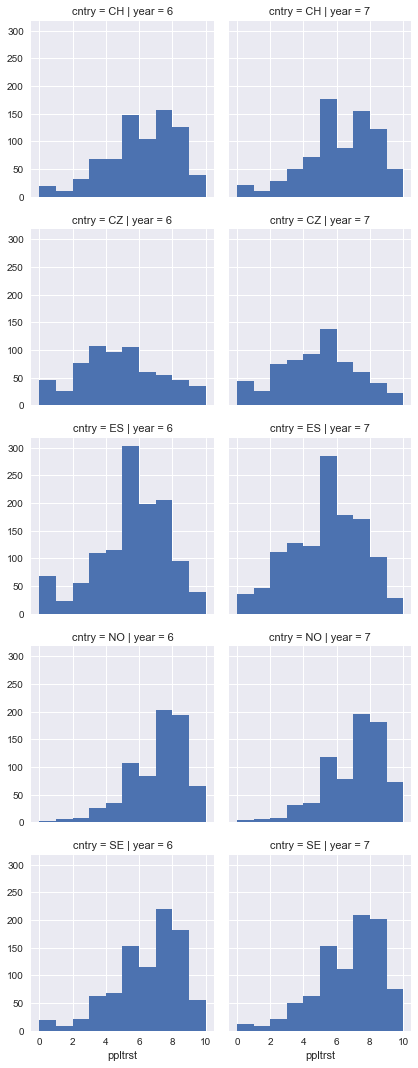

In [19]:
import seaborn as sns

g = sns.FacetGrid(ess, col = 'year', row='cntry')
g.map(plt.hist, 'ppltrst')
plt.show()

Data is close enough to normal distribution (left skew seems to be biggest issue) to use t-test.

In [58]:
countrylist = ess.cntry.unique()
trust_year = {}

df_12 = ess.loc[ess.year==6,:]
df_14 = ess.loc[ess.year==7,:]

for country in countrylist:
    trust_year[country] = stats.ttest_ind(df_12.loc[df_12.cntry==country, 'ppltrst'],
                                                  df_14.loc[df_14.cntry==country, 'ppltrst'],
                                                  axis=None, equal_var=True, nan_policy='omit')

In [59]:
print(trust_year)

{'CH': Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234), 'CZ': Ttest_indResult(statistic=-0.47654431369598554, pvalue=0.6337663626855166), 'ES': Ttest_indResult(statistic=2.4942765167160026, pvalue=0.012687599930346013), 'NO': Ttest_indResult(statistic=0.5437669865283744, pvalue=0.586684963598745), 'SE': Ttest_indResult(statistic=-2.089164843127998, pvalue=0.036832086995183345)}


No significant changes in CH, cZ, and NO. Significant changes in ES and SE.

# Question 2
Did people become happier from 2012 to 2014? Compute results for each country in the sample.

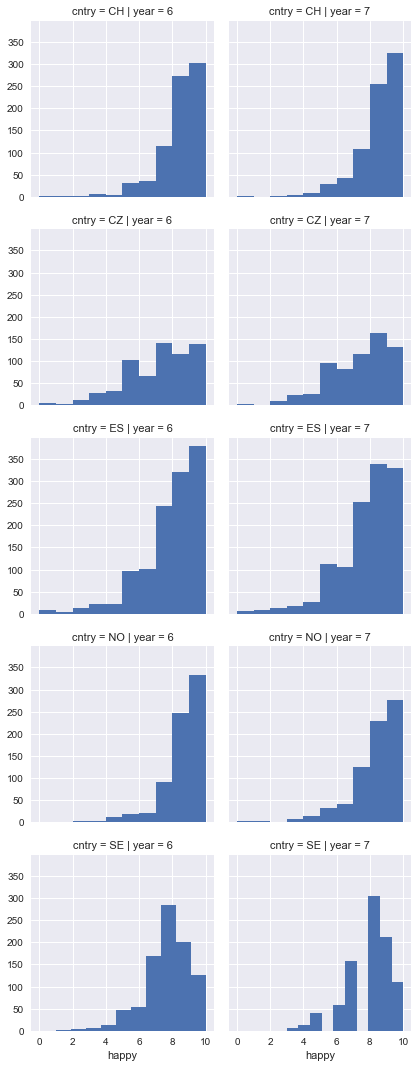

In [30]:
g = sns.FacetGrid(ess, col = 'year', row='cntry')
g.map(plt.hist, 'happy')
plt.show()

Highly skewed to the left ("because we're happy") so will use parametric and non-parametric techniques

In [56]:
happier = {}
for country in countrylist:
    happier[country] = stats.ttest_ind(df_12.loc[df_12.cntry==country, 'happy'],
                                                  df_14.loc[df_14.cntry==country, 'happy'],
                                                  axis=None, equal_var=True, nan_policy='omit')

In [57]:
print(happier)

{'CH': Ttest_indResult(statistic=-0.3883916732706544, pvalue=0.6977798552552132), 'CZ': Ttest_indResult(statistic=-1.3033790688858846, pvalue=0.19267687243588685), 'ES': Ttest_indResult(statistic=1.6739845099484867, pvalue=0.09426276206942426), 'NO': Ttest_indResult(statistic=4.26539164981969, pvalue=2.1241259786819524e-05), 'SE': Ttest_indResult(statistic=-0.5748685401292095, pvalue=0.5654516534859646)}


According to ttest no-one became significantly happier.

In [46]:
# Using non-parametric
# Join all ratings together into a list, then ranking them.

for country in countrylist:
    temp = ess.loc[ess.cntry==country, :]
    temp['rank'] = stats.rankdata(temp.loc[:, 'happy'])
    print('Result for {} is {}'.format(country, stats.kruskal(temp.loc[temp.year==6, 'rank'],
                                                       temp.loc[temp.year==7, 'rank'])))


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Result for CH is KruskalResult(statistic=0.11199672775584622, pvalue=0.7378822411273755)
Result for CZ is KruskalResult(statistic=0.7741339435361708, pvalue=0.3789412142073376)
Result for ES is KruskalResult(statistic=4.0786022231195425, pvalue=0.043429571364942514)
Result for NO is KruskalResult(statistic=20.63472268007812, pvalue=5.557890653893063e-06)
Result for SE is KruskalResult(statistic=0.09458914374973465, pvalue=0.7584221220941747)


So some indication that ES got happier (also significant at 10% in ttest).

# Question 3
Who reported watching more TV in 2012, men or women?

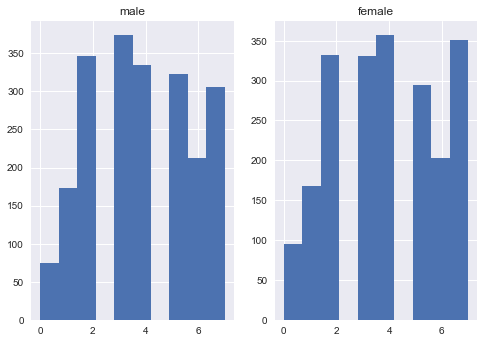

In [55]:
plt.subplot(1,2,1)
plt.hist(df_12.loc[df_12.gndr==1.0, 'tvtot'].dropna())
plt.title("male")
plt.subplot(1,2,2)
plt.hist(df_12.loc[df_12.gndr==2, 'tvtot'].dropna())
plt.title("female")
plt.show()

Missing values makes it look worse than it is. Will use ttest.

In [64]:
print(stats.ttest_ind(df_12.loc[df_12.gndr==1.0, 'tvtot'],
                      df_12.loc[df_12.gndr==2.0, 'tvtot'],
                      axis=None, equal_var=False, nan_policy='omit'))

Ttest_indResult(statistic=-0.6974681202754935, pvalue=0.4855478715281596)


Cannot reject null hypothesis that men and women watch the same amount of TV.

# Question 4
Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

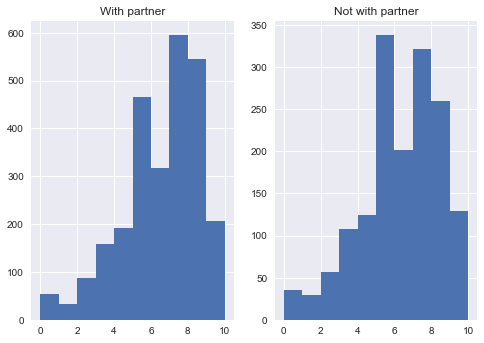

In [65]:
plt.subplot(1,2,1)
plt.hist(df_12.loc[df_12.partner==1.0, 'pplfair'].dropna())
plt.title("With partner")
plt.subplot(1,2,2)
plt.hist(df_12.loc[df_12.partner==2.0, 'pplfair'].dropna())
plt.title("Not with partner")
plt.show()

Note different y-axis

In [66]:
print(stats.ttest_ind(df_12.loc[df_12.partner==1.0, 'pplfair'],
                      df_12.loc[df_12.partner==2.0, 'pplfair'],
                      axis=None, equal_var=True, nan_policy='omit'))

Ttest_indResult(statistic=3.2268056378996066, pvalue=0.0012612884445010728)
